## Seeing issues when calling `fetch` over the remote SDK

In [1]:
from typing import *
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
def get_meta(file_path: str) -> Dict[str, str]:
    """
    Returns a dictionary of metadata associated with a previous SpikeGLX acquisition run.
    Only used when DEBUG_MODE=True.

    Should be a file_path that ends in `.meta`

    Parameters
    ----------
    file_path : str
        File name containing the metadata
    """
    # conver to path object
    file_path = Path(file_path)

    # initialize dictionary
    metadata = dict()

    if file_path.exists():
        with file_path.open() as f:
            mdata = f.read().splitlines()
            for m in mdata:
                item = m.split(sep='=')
                if item[0][0] == '~':
                    key = item[0][1:len(item[0])]
                else:
                    key = item[0]
                metadata.update({key: item[1]})
    else:
        raise FileNotFoundError(file_path)

    return metadata



def get_sample_data(file_path: str, meta_data: Dict[str, str]):
    """
    Returns a numpy array of data from a previous SpikeGLX acquisition run.

    Should be a file_path that ends in `.bin`

    Parameters
    ----------
    file_path : str
        File name of the binary file containing the data
    meta_data : Dict[str, str]
        Dictionary containing metadata needed to load the data in the correct format
    """
    nChan = int(meta_data['nSavedChans'])
    nFileSamp = int(int(meta_data['fileSizeBytes'])/(2*nChan))

    data = np.memmap(file_path, dtype='int16', mode='r',
                        shape=(nChan, nFileSamp), offset=0, order='F')

    return data

In [25]:
meta_data = get_meta("/home/clewis/repos/realSpike/data/120s_test/rb50_20250126_g0_t0.imec0.ap.meta")
sample_data = get_sample_data("/home/clewis/repos/realSpike/data/120s_test/rb50_20250126_g0_t0.imec0.ap.bin", meta_data)[:150, :]

In [26]:
sample_data.shape

(150, 3600001)

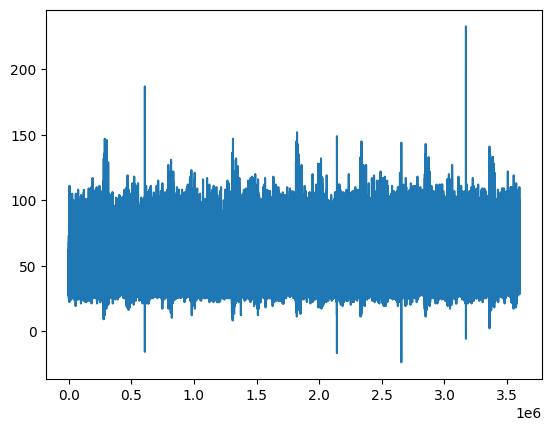

In [27]:
plt.plot(np.max(sample_data, axis=0))

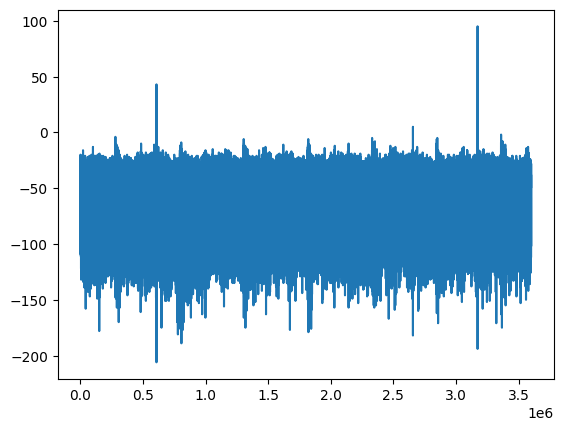

In [28]:
plt.plot(np.min(sample_data, axis=0))

In [29]:
Vmax = float(meta_data["imAiRangeMax"])
# get Imax
Imax = float(meta_data["imMaxInt"])
# get gain
gain = float(meta_data['imroTbl'].split(sep=')')[1].split(sep=' ')[3])

In [30]:
data = 1e6 * sample_data * Vmax / Imax / gain

In [31]:
np.max(data, axis=0).max()

546.09375

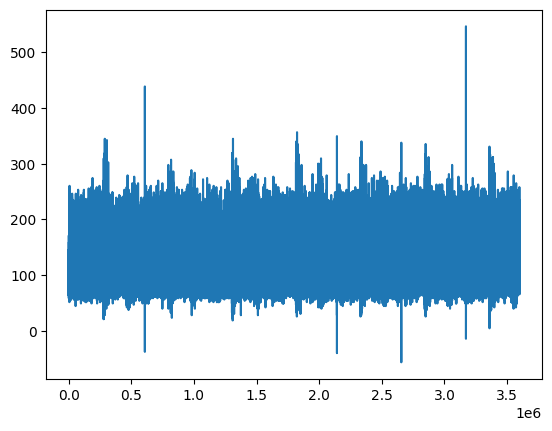

In [32]:
plt.plot(np.max(data, axis=0))

In [33]:
np.min(data, axis=0).min()

-482.8125

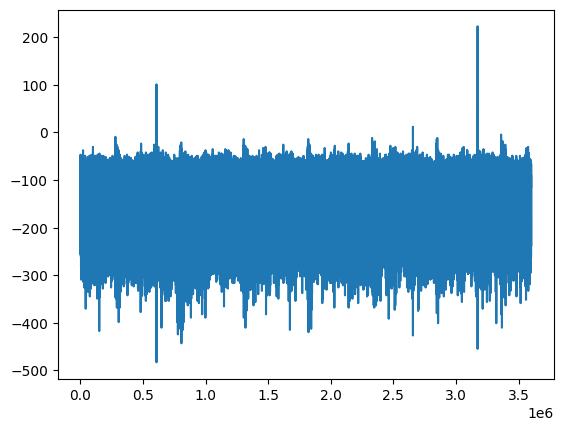

In [34]:
plt.plot(np.min(data, axis=0))

In [35]:
data[:, :150]

array([[ 39.84375,  39.84375,  35.15625, ...,  39.84375,  49.21875,
         46.875  ],
       [-21.09375, -28.125  , -23.4375 , ...,  -4.6875 , -18.75   ,
         -7.03125],
       [ -7.03125,  -9.375  , -18.75   , ..., -16.40625, -14.0625 ,
         -4.6875 ],
       ...,
       [ 37.5    ,  42.1875 ,  44.53125, ...,  28.125  ,  23.4375 ,
         46.875  ],
       [ 44.53125,  30.46875,  25.78125, ...,  32.8125 ,  35.15625,
         32.8125 ],
       [ 77.34375,  72.65625,  67.96875, ...,  77.34375,  91.40625,
         82.03125]])